In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

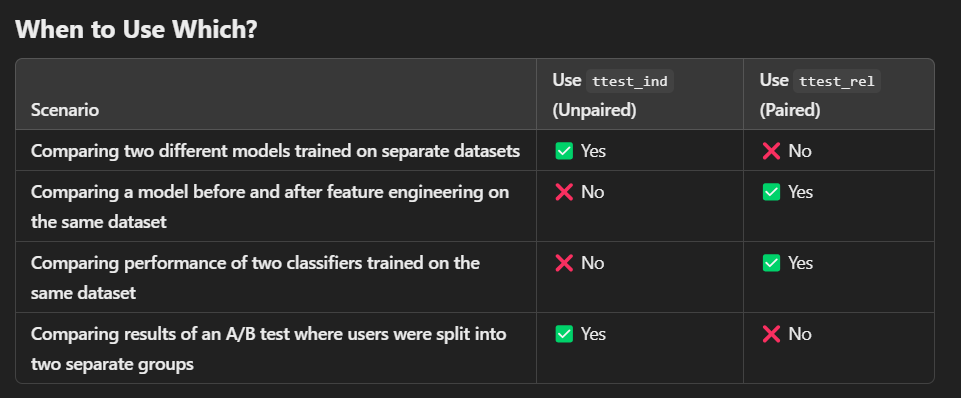

In [3]:
# Step 2: Define and train two models

# Model A: Logistic Regression with default hyperparameters
model_a = LogisticRegression(max_iter=1000)
model_a.fit(X_train, y_train)

# Model B: Logistic Regression with stronger regularization (C=0.1)
model_b = LogisticRegression(C=0.1, max_iter=1000)
model_b.fit(X_train, y_train)



LogisticRegression(C=0.1, max_iter=1000)

In [4]:
# Step 3: Simulate A/B testing

# Split test data into two groups (simulating users)

n_test = len(X_test)
group_a_indices = np.random.choice(n_test, size=n_test // 2, replace=False)
group_b_indices = np.setdiff1d(np.arange(n_test), group_a_indices)

X_group_a, y_group_a = X_test[group_a_indices], y_test[group_a_indices]
X_group_b, y_group_b = X_test[group_b_indices], y_test[group_b_indices]



In [5]:
# Predict outcomes for each group

y_pred_a = model_a.predict(X_group_a)
y_pred_b = model_b.predict(X_group_b)

# Step 4: Evaluate model performance (offline metric: accuracy)

accuracy_a = accuracy_score(y_group_a, y_pred_a)
accuracy_b = accuracy_score(y_group_b, y_pred_b)

print(f"Model A Accuracy: {accuracy_a:.4f}")
print(f"Model B Accuracy: {accuracy_b:.4f}")



Model A Accuracy: 0.8933
Model B Accuracy: 0.8400


In [6]:
# Step 5: Simulate a business KPI (e.g., "conversion rate")

# Assume "1" predictions lead to conversions with some noise

conversion_rate_a = np.mean(y_pred_a) * 0.9 + np.random.normal(0, 0.05)  # Simulated with noise
conversion_rate_b = np.mean(y_pred_b) * 0.9 + np.random.normal(0, 0.05)

print(f"Model A Conversion Rate: {conversion_rate_a:.4f}")
print(f"Model B Conversion Rate: {conversion_rate_b:.4f}")



Model A Conversion Rate: 0.4385
Model B Conversion Rate: 0.4829


In [7]:
# Step 6: Statistical test to determine the "better" model

# Perform a two-sample t-test on the conversion rates (simulated user responses)

# Here, we simulate multiple "trials" for robustness

n_trials = 1000
sim_conversions_a = np.random.binomial(n=len(y_pred_a), p=conversion_rate_a, size=n_trials)
sim_conversions_b = np.random.binomial(n=len(y_pred_b), p=conversion_rate_b, size=n_trials)

t_stat, p_value = stats.ttest_ind(sim_conversions_a, sim_conversions_b)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")



T-statistic: -24.0477, P-value: 0.0000


In [8]:
# Step 7: Decision

alpha = 0.05  # Significance level

if p_value < alpha:
    if conversion_rate_a > conversion_rate_b:
        print("Model A is statistically better based on conversion rate.")
    else:
        print("Model B is statistically better based on conversion rate.")
else:
    print("No statistically significant difference between Model A and Model B.")

Model B is statistically better based on conversion rate.


# A/B Testing in Model Selection with Statistical Testing

### Why Use a For Loop?
#### ML models have variability

- Even with the same dataset, different train-test splits or model randomness (e.g., tree-based models) can slightly change the results.
- Running the model multiple times and taking an average accuracy ensures a more stable comparison.
More reliable statistical testing

#### Statistical tests (like ttest_rel or ttest_ind) work best with a larger sample size.
- If we only have one accuracy value per model, the test may not be reliable.
- By running multiple experiments, we get a distribution of accuracy scores, making our A/B test more statistically sound.

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import ttest_ind,ttest_rel
accuracy_model_A = []
accuracy_model_B = []

for _ in range(10):  # Run 10 different train-test splits
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.2, random_state=_)
    
    model_A = LogisticRegression().fit(X_train_split, y_train_split)
    model_B = RandomForestClassifier(random_state=42).fit(X_train_split, y_train_split)

    accuracy_model_A.append(accuracy_score(y_test_split, model_A.predict(X_test_split)))
    accuracy_model_B.append(accuracy_score(y_test_split, model_B.predict(X_test_split)))
    

t_stat, p_value = ttest_rel(accuracy_model_A, accuracy_model_B)
print(f"Independent t-test: t-stat={t_stat:.3f}, p-value={p_value:.3f}")

if p_value < 0.05:
    print("The two models have significantly different performance.")
else:
    print("No significant difference in performance.")


Independent t-test: t-stat=-7.797, p-value=0.000
The two models have significantly different performance.


# A/B Testing in Feature Engineering with Statistical Significance

In [10]:
# Sample Data
np.random.seed(42)
data = pd.DataFrame(np.random.rand(1000, 5), columns=['f1', 'f2', 'f3', 'f4', 'f5'])
data['target'] = np.random.randint(0, 2, 1000)

# Split Data
X = data.drop(columns=['target'])  # Feature set (all features)
y = data['target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from scipy.stats import ttest_rel
import numpy as np

# Generate accuracy scores from multiple train-test splits (to simulate different runs)
n_runs = 10
baseline_scores = []
new_feature_scores = []

for _ in range(n_runs):
    # Train models on different train-test splits
    X_train_A, X_test_A = X_train[['f1', 'f2', 'f3']], X_test[['f1', 'f2', 'f3']]
    X_train_B, X_test_B = X_train[['f1', 'f2', 'f3', 'f4', 'f5']], X_test[['f1', 'f2', 'f3', 'f4', 'f5']]

    model_A = RandomForestClassifier(random_state=42).fit(X_train_A, y_train)
    model_B = RandomForestClassifier(random_state=42).fit(X_train_B, y_train)

    baseline_scores.append(accuracy_score(y_test, model_A.predict(X_test_A)))
    new_feature_scores.append(accuracy_score(y_test, model_B.predict(X_test_B)))

# Perform Paired T-Test
t_stat, p_value = ttest_rel(baseline_scores, new_feature_scores)
print(f"Paired t-test: t-stat={t_stat:.3f}, p-value={p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("The new features significantly improve performance (p < 0.05)")
else:
    print("No significant difference between feature sets (p >= 0.05)")


Paired t-test: t-stat=12970366926827030.000, p-value=0.000
The new features significantly improve performance (p < 0.05)


C:\Users\bharathreddybollu\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


# A/B Testing in Hyperparameter Tuning with Statistical Testing

In [12]:
from sklearn.model_selection import RandomizedSearchCV

baseline_scores = []
tuned_scores = []

for _ in range(n_runs):
    # A: Baseline model
    model_A = RandomForestClassifier(random_state=42).fit(X_train, y_train)
    baseline_scores.append(accuracy_score(y_test, model_A.predict(X_test)))

    # B: Tuned model
    param_dist = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    model_B = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=5, cv=3, random_state=42)
    model_B.fit(X_train, y_train)
    
    tuned_scores.append(accuracy_score(y_test, model_B.best_estimator_.predict(X_test)))

# Perform Paired T-Test
t_stat, p_value = ttest_rel(baseline_scores, tuned_scores)
print(f"Paired t-test: t-stat={t_stat:.3f}, p-value={p_value:.3f}")

if p_value < 0.05:
    print("Tuned model significantly outperforms baseline model (p < 0.05)")
else:
    print("No significant difference between models (p >= 0.05)")


Paired t-test: t-stat=nan, p-value=nan
No significant difference between models (p >= 0.05)


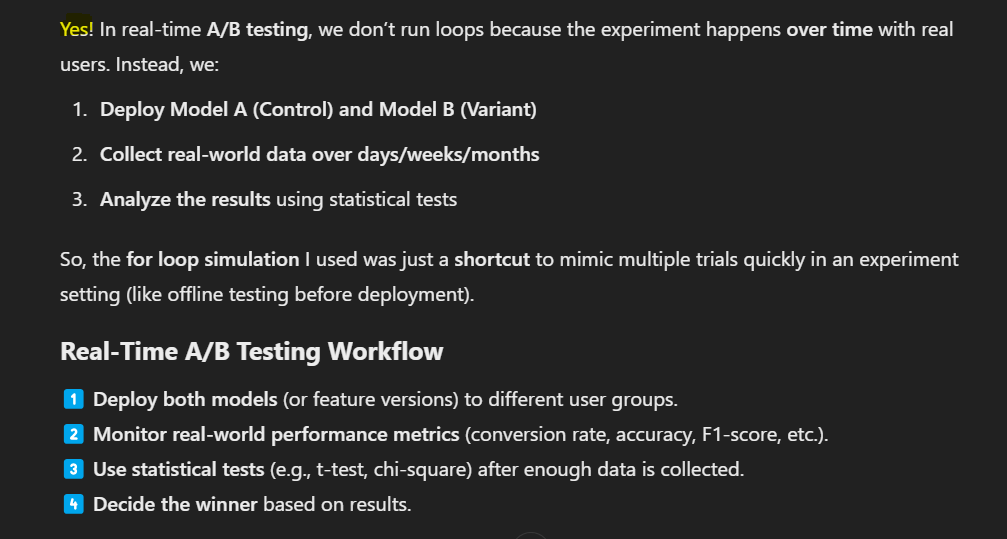

#### Real-World A/B Test Example (No Loops, Using Real Data)
- Let's assume:

- Model A (old model) is used by 50% of users.
- Model B (new model) is tested on the other 50%.
- We track conversion rates (e.g., % of users who buy a product).

In [13]:
import pandas as pd
from scipy.stats import ttest_ind

# Simulated real-world A/B test results over a few weeks
data = {
    "Group": ["A"] * 5000 + ["B"] * 5000,
    "Conversion": [1] * 500 + [0] * 4500 +  # Model A: 500 conversions out of 5000
                 [1] * 550 + [0] * 4450    # Model B: 550 conversions out of 5000
}

df = pd.DataFrame(data)

# Split data into A and B groups
conversions_A = df[df["Group"] == "A"]["Conversion"]
conversions_B = df[df["Group"] == "B"]["Conversion"]

# Perform Independent t-test (since A/B groups are independent)
t_stat, p_value = ttest_ind(conversions_A, conversions_B)

print(f"Independent t-test: t-stat={t_stat:.3f}, p-value={p_value:.3f}")

if p_value < 0.05:
    print("Model B significantly improves conversion rates! ✅")
else:
    print("No significant difference between Model A and B. ❌")


Independent t-test: t-stat=-1.631, p-value=0.103
No significant difference between Model A and B. ❌


### Conclusion
- Before Deployment → We simulate multiple tests (looping helps).
- After Deployment (Real A/B Testing) → We wait for real data, then analyze it once.